In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import concurrent.futures as cf
import json

In [2]:
# Read data
df = pd.read_csv("data/data.csv")
df = df.drop_duplicates()

In [3]:
df

,name,title,rating
0,Spaxe,Pokemon Sword,5
1,Spaxe,Luigi's Mansion 3,9
2,Ninjasuite,Pokemon Sword,3
3,Zerato,Pokemon Sword,5
4,Alvertin,Etrian Odyssey 2 Untold: The Fafnir Knight,9
...,...,...,...
378519,tonyhank232,Far Cry 4,9
378520,jorge7ejea,The Witcher 3: Wild Hunt,0
378521,IDDQYU,The Witcher 3: Wild Hunt,10
378522,Estev0n,The Witcher 3: Wild Hunt,10


In [4]:
data_grouped = df.groupby("name")

In [5]:
data_counts = data_grouped.size()
data_counts = data_counts.loc[data_counts > 20]
data_counts = data_counts.sort_values()
data_mean = data_counts.mean()
data_med = data_counts.median()

# Afficher les résultats
data_counts

name
Galix               21
Belarus_neckoby     21
bhappenstance       21
kstud1              21
Ponds98             21
                  ... 
Vaulie             584
drlowdon           608
Hangrad            817
SuperkenGaming     819
fiachra            834
Length: 2314, dtype: int64

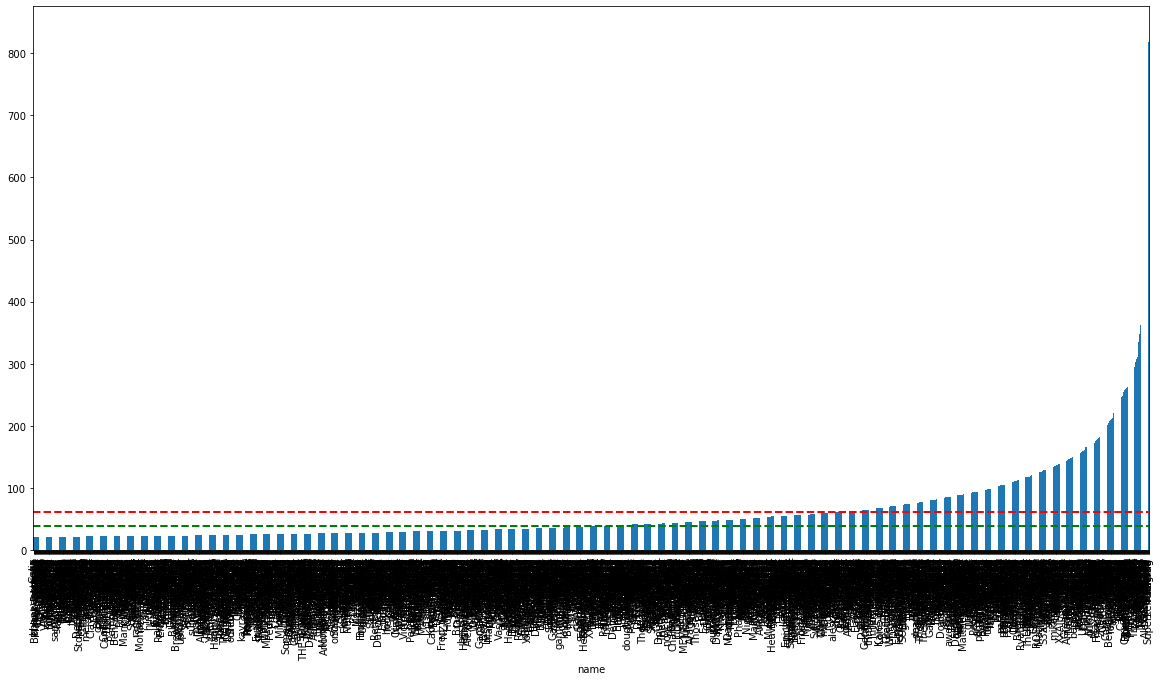

In [6]:
# Afficher un diagramme en barres
plt.figure(figsize=(20, 10))
data_counts.plot(kind="bar")

# Ajouter la moyenne à l'axe des y
plt.axhline(data_mean, color="red", linestyle="dashed", linewidth=2)

# Ajouter la médiane à l'axe des y
plt.axhline(data_med, color="green", linestyle="dashed", linewidth=2)

# Afficher le diagramme
plt.show()

In [7]:
# Récupère les jeux joués par les profils qui ont joués à plus de 20 jeux différents
profils = df.loc[df['name'].isin(data_counts.index)]

In [8]:
profils

,name,title,rating
73,PewPewMcP,Death's Door,9
74,PewPewMcP,Bright Memory: Infinite,8
75,PewPewMcP,Ys IX: Monstrum Nox,9
76,PewPewMcP,Pokemon Shining Pearl,4
77,PewPewMcP,Pokemon Brilliant Diamond,4
...,...,...,...
378515,tonyhank232,Batman: Arkham Knight,9
378516,tonyhank232,Bully,9
378517,tonyhank232,Metro Redux,8
378518,tonyhank232,Dragon Age: Inquisition,8


In [9]:
t1 = pd.read_json('data/videogames.json')
t2 = pd.read_json('data/videogames2.json')
t3 = pd.read_json('data/videogames3.json')
t4 = pd.read_json('data/videogames4.json')
t5 = pd.read_json('data/videogames5.json')
t6 = pd.read_json('data/videogames6.json')
t7 = pd.read_json('data/videogames7.json')

In [10]:
t = pd.concat([t1,t2,t3,t4,t5,t6,t7])

In [11]:
t.drop(columns=['id', 'slug', 'released', 'tba', 'background_image', 'rating',
       'rating_top', 'ratings', 'ratings_count', 'reviews_text_count', 'added',
       'added_by_status', 'playtime', 'suggestions_count',
       'updated', 'user_game', 'reviews_count', 'community_rating', 'saturated_color', 'dominant_color', 'stores', 'clip', 'esrb_rating', 'short_screenshots'],inplace=True)

In [12]:
t.columns

Index(['name', 'metacritic', 'platforms', 'parent_platforms', 'genres',
       'tags'],
      dtype='object')

In [13]:
t['platforms'] = t['platforms'].apply(json.dumps)
t['genres'] = t['genres'].apply(json.dumps)
t['tags'] = t['tags'].apply(json.dumps)
t['parent_platforms'] = t['parent_platforms'].apply(json.dumps)

In [14]:
t = t.drop_duplicates()

In [15]:
mask = profils['title'].isin(t['name'])
mask2 = ~profils['title'].isin(t['name'])
print(profils[mask])
print(profils[mask2])

               name                    title  rating
73        PewPewMcP             Death's Door       9
74        PewPewMcP  Bright Memory: Infinite       8
75        PewPewMcP      Ys IX: Monstrum Nox       9
78        PewPewMcP            Metroid Dread      10
79        PewPewMcP  Kena: Bridge of Spirits       7
...             ...                      ...     ...
378514  tonyhank232           Far Cry Primal       8
378515  tonyhank232    Batman: Arkham Knight       9
378516  tonyhank232                    Bully       9
378518  tonyhank232  Dragon Age: Inquisition       8
378519  tonyhank232                Far Cry 4       9

[112869 rows x 3 columns]
               name                            title  rating
76        PewPewMcP            Pokemon Shining Pearl       4
77        PewPewMcP        Pokemon Brilliant Diamond       4
85        PewPewMcP          BPM: Bullets Per Minute       6
91        PewPewMcP                    Pokemon Sword       3
92        PewPewMcP             

In [21]:
idd = list(range(0,813424))

In [22]:
t['idd'] = idd

In [29]:
t = t.set_index(t['idd'])

In [30]:
t.to_json('data/rawg.json')

In [31]:
t

,name,metacritic,platforms,parent_platforms,genres,tags,idd
idd,,,,,,,
0,Paint Your Life-Ludum Dare 51,NaN,"[{""platform"": {""id"": 4, ""name"": ""PC"", ""slug"": ...","[{""platform"": {""id"": 1, ""name"": ""PC"", ""slug"": ...","[{""id"": 4, ""name"": ""Action"", ""slug"": ""action"",...","[{""id"": 13, ""name"": ""Atmospheric"", ""slug"": ""at...",0
1,Star Wars RPG MZ (+Coop),NaN,"[{""platform"": {""id"": 171, ""name"": ""Web"", ""slug...","[{""platform"": {""id"": 14, ""name"": ""Web"", ""slug""...","[{""id"": 3, ""name"": ""Adventure"", ""slug"": ""adven...","[{""id"": 18, ""name"": ""Co-op"", ""slug"": ""co-op"", ...",1
2,Familiar Faces Vol.1,NaN,"[{""platform"": {""id"": 4, ""name"": ""PC"", ""slug"": ...","[{""platform"": {""id"": 1, ""name"": ""PC"", ""slug"": ...","[{""id"": 5, ""name"": ""RPG"", ""slug"": ""role-playin...","[{""id"": 32, ""name"": ""Sci-fi"", ""slug"": ""sci-fi""...",2
3,Hatsune Miku Logic Paint S,NaN,"[{""platform"": {""id"": 4, ""name"": ""PC"", ""slug"": ...","[{""platform"": {""id"": 1, ""name"": ""PC"", ""slug"": ...","[{""id"": 40, ""name"": ""Casual"", ""slug"": ""casual""...","[{""id"": 31, ""name"": ""Singleplayer"", ""slug"": ""s...",3
4,Periphery Synthetic EP,NaN,"[{""platform"": {""id"": 171, ""name"": ""Web"", ""slug...","[{""platform"": {""id"": 1, ""name"": ""PC"", ""slug"": ...","[{""id"": 14, ""name"": ""Simulation"", ""slug"": ""sim...","[{""id"": 13, ""name"": ""Atmospheric"", ""slug"": ""at...",4
...,...,...,...,...,...,...,...
813419,Atriarch,NaN,"[{""platform"": {""id"": 4, ""name"": ""PC"", ""slug"": ...","[{""platform"": {""id"": 1, ""name"": ""PC"", ""slug"": ...","[{""id"": 5, ""name"": ""RPG"", ""slug"": ""role-playin...",[],813419
813420,French Street Racing,NaN,"[{""platform"": {""id"": 4, ""name"": ""PC"", ""slug"": ...","[{""platform"": {""id"": 1, ""name"": ""PC"", ""slug"": ...","[{""id"": 1, ""name"": ""Racing"", ""slug"": ""racing"",...",[],813420
813421,Adellion,NaN,"[{""platform"": {""id"": 4, ""name"": ""PC"", ""slug"": ...","[{""platform"": {""id"": 1, ""name"": ""PC"", ""slug"": ...","[{""id"": 5, ""name"": ""RPG"", ""slug"": ""role-playin...",[],813421


In [34]:
t.loc[t['name'] == 'pokemon shining pearl']

,name,metacritic,platforms,parent_platforms,genres,tags,idd
idd,,,,,,,


In [256]:
plat = t['platforms']
tags = t['tags']
gen = t['genres']

In [188]:
ptest = json.loads(plat[53899])

In [218]:
print(json.loads(plat[53899]))

[{'platform': {'id': 1, 'name': 'Xbox One', 'slug': 'xbox-one', 'image': None, 'year_end': None, 'year_start': None, 'games_count': 5441, 'image_background': 'https://media.rawg.io/media/games/34b/34b1f1850a1c06fd971bc6ab3ac0ce0e.jpg'}, 'released_at': '2010-05-18', 'requirements_en': None, 'requirements_ru': None}, {'platform': {'id': 14, 'name': 'Xbox 360', 'slug': 'xbox360', 'image': None, 'year_end': None, 'year_start': None, 'games_count': 2774, 'image_background': 'https://media.rawg.io/media/games/157/15742f2f67eacff546738e1ab5c19d20.jpg'}, 'released_at': '2010-05-18', 'requirements_en': None, 'requirements_ru': None}, {'platform': {'id': 16, 'name': 'PlayStation 3', 'slug': 'playstation3', 'image': None, 'year_end': None, 'year_start': None, 'games_count': 3494, 'image_background': 'https://media.rawg.io/media/games/7cf/7cfc9220b401b7a300e409e539c9afd5.jpg'}, 'released_at': '2010-05-18', 'requirements_en': None, 'requirements_ru': None}]


In [257]:
len(plat)

615275

In [263]:
tkt = []
for i in range(len(plat)):
    print(i)
    r = plat[i].replace("\\","").replace('"[','[').replace(']"',"]").replace('\\','')
    u = json.loads(r)
    b = []
    for j in range(len(u)):
        b.append(u[j]['platform']['name'])
    tkt.append(b)

0
1
2
3


JSONDecodeError: Expecting ',' delimiter: line 1 column 321 (char 320)

In [211]:
len(tkt)

75086

In [166]:
plat

idd
0         [{'platform': {'id': 4, 'name': 'PC', 'slug': ...
1         [{'platform': {'id': 171, 'name': 'Web', 'slug...
2         [{'platform': {'id': 4, 'name': 'PC', 'slug': ...
3         [{'platform': {'id': 4, 'name': 'PC', 'slug': ...
4         [{'platform': {'id': 171, 'name': 'Web', 'slug...
                                ...                        
615270    [{"platform": {"id": 4, "name": "PC", "slug": ...
615271    [{"platform": {"id": 171, "name": "Web", "slug...
615272    [{"platform": {"id": 4, "name": "PC", "slug": ...
615273    [{"platform": {"id": 21, "name": "Android", "s...
615274    [{"platform": {"id": 4, "name": "PC", "slug": ...
Name: platforms, Length: 615275, dtype: object

In [ ]:
plat[0]

In [190]:
ptest[2]['platform']['name']

'PlayStation 3'

In [177]:
len(ptest)

3

In [225]:
json.loads(plat[75087])

'{'

In [228]:
type(plat[75085])

str

In [265]:
plat[3].replace("\\","").replace('"[','[').replace(']"',"]").replace('\\','')

'[{"platform": {"id": 4, "name": "PC", "slug": "pc", "image": null, "year_end": null, "year_start": null, "games_count": 502092, "image_background": "https://media.rawg.io/media/games/49c/49c3dfa4ce2f6f140cc4825868e858cb.jpg"}, "released_at": null, "requirements_en": {"minimum": "<strong>Minimum:</strong><br><ul class="bb_ul"><li><strong>OS:</strong> Windows 10 64bit<br></li><li><strong>Processor:</strong> 2 Ghz Processor<br></li><li><strong>Memory:</strong> 4 GB RAM<br></li><li><strong>Graphics:</strong> DirectX Version 11 compatible video card<br></li><li><strong>DirectX:</strong> Version 11<br></li><li><strong>Storage:</strong> 750 MB available space</li></ul>", "recommended": "<strong>Recommended:</strong><br><ul class="bb_ul"><li><strong>OS:</strong> Windows 10 64bit<br></li><li><strong>Processor:</strong> 2 Ghz Processor<br></li><li><strong>Memory:</strong> 4 GB RAM<br></li><li><strong>Graphics:</strong> DirectX  Version 11 compatible video card<br></li><li><strong>DirectX:</stro

In [261]:
plat[3][310:330]

'ul class=\\"bb_ul\\"><'